In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [4]:
notebook = "real7_Satellite"

In [5]:
import numpy as np

from pmlb import fetch_data

X, y = fetch_data('294_satellite_image', return_X_y=True)

In [6]:
ndpost = 10000
nskip = 0
n_trees = 100

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
proposal_probs_default = {
    'grow': 0.25,
    'prune': 0.25,
    'change': 0.4,
    'swap': 0.1
}
bart = DefaultBART(ndpost=ndpost, nskip=nskip, n_trees=n_trees,
                proposal_probs=proposal_probs_default, random_state=0)
bart.fit(X_train, y_train)
sigmas = [trace.global_params['eps_sigma2'] for trace in bart.sampler.trace]
preds = bart.posterior_f(X_test, backtransform=True)
rmses = [root_mean_squared_error(y_test, preds[:, k]) for k in range(preds.shape[1])]

np.save(f'store/{notebook}_sigmas_default.npy', np.array(sigmas))
np.save(f'store/{notebook}_rmses_default.npy', np.array(rmses))

In [ ]:
proposal_probs_mtmh = {
    'multi_grow': 0.25,
    'multi_prune': 0.25,
    'multi_change': 0.4,
    'multi_swap': 0.1
}
bart = MultiBART(ndpost=ndpost, nskip=nskip, n_trees=n_trees,
                proposal_probs=proposal_probs_mtmh, multi_tries=10, random_state=0)
bart.fit(X_train, y_train)
sigmas = [trace.global_params['eps_sigma2'] for trace in bart.sampler.trace]
preds = bart.posterior_f(X_test, backtransform=True)
rmses = [root_mean_squared_error(y_test, preds[:, k]) for k in range(preds.shape[1])]

np.save(f'store/{notebook}_sigmas_mtmh.npy', np.array(sigmas))
np.save(f'store/{notebook}_rmses_mtmh.npy', np.array(rmses))

In [8]:
from diagnosis import segmented_ljung_box_test, segment_ess_efficiency

## Default

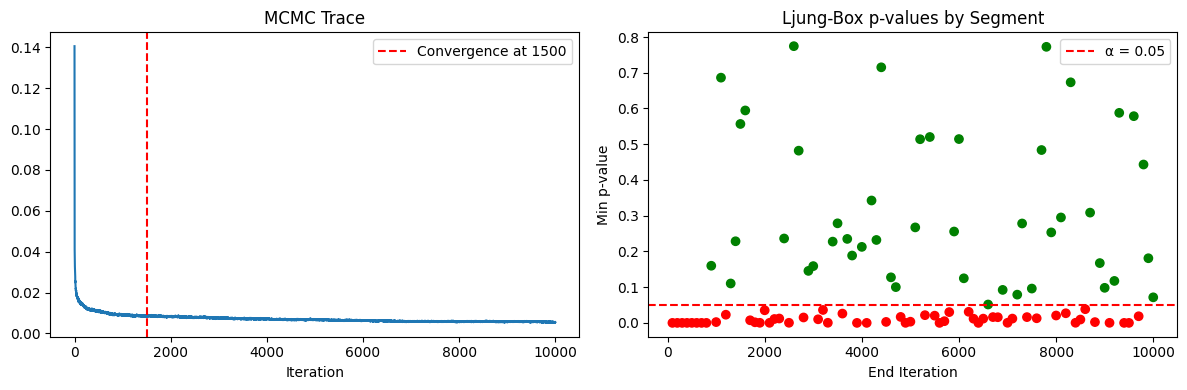

Chain converged: True
Convergence at iteration: 1500
Convergence rate: 46.00%


In [9]:
# Diagnose default sigma convergence
sigmas = np.load(f'store/{notebook}_sigmas_default.npy')
convergence_result = segmented_ljung_box_test(sigmas, segment_length=100)

print(f"Chain converged: {convergence_result['converged']}")
if convergence_result['converged']:
    print(f"Convergence at iteration: {convergence_result['convergence_iteration']}")
print(f"Convergence rate: {convergence_result['convergence_rate']:.2%}")

/nfs/home/svu/e0950116/bart-playground/diagnosis/diagnosis.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


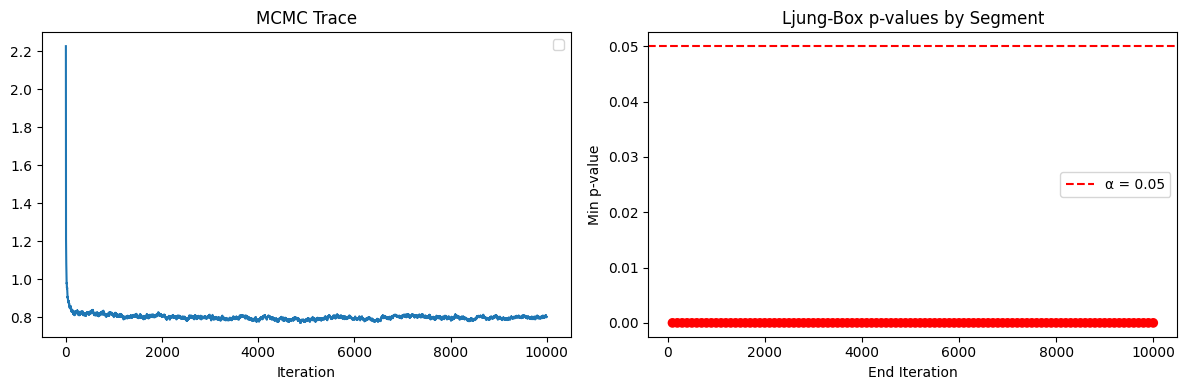

Chain converged: False
Convergence rate: 0.00%


In [10]:
# Diagnose default rmse convergence
rmses = np.load(f'store/{notebook}_rmses_default.npy')
convergence_result = segmented_ljung_box_test(rmses, segment_length=100)

print(f"Chain converged: {convergence_result['converged']}")
if convergence_result['converged']:
    print(f"Convergence at iteration: {convergence_result['convergence_iteration']}")
print(f"Convergence rate: {convergence_result['convergence_rate']:.2%}")

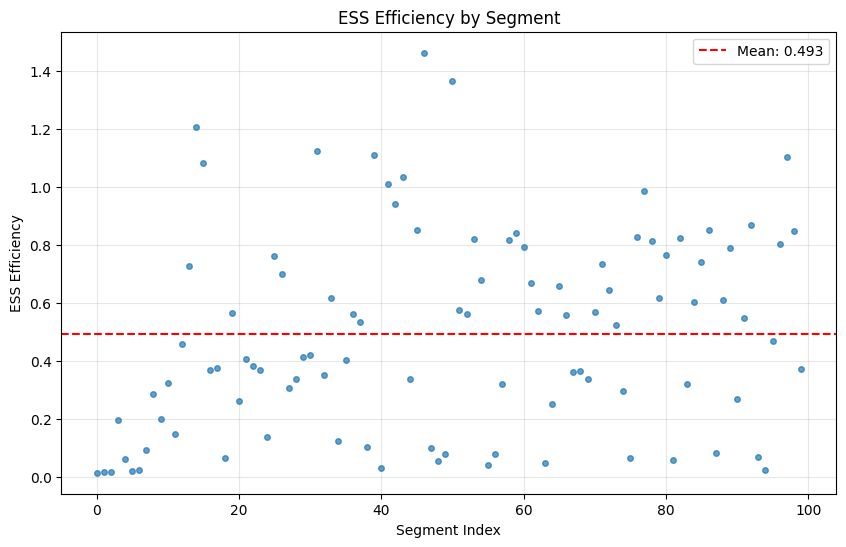

In [11]:
sigmas = np.load(f'store/{notebook}_sigmas_default.npy')
efficiencies = segment_ess_efficiency(sigmas, segment_length=100)

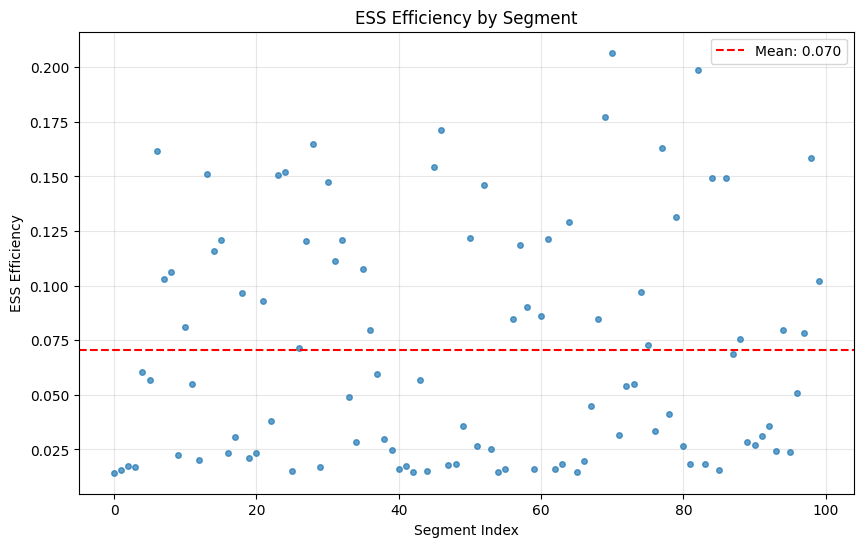

In [12]:
rmses = np.load(f'store/{notebook}_rmses_default.npy')
efficiencies = segment_ess_efficiency(rmses, segment_length=100)

### Autocorrelation

In [13]:
from diagnosis import plot_autocorrelation

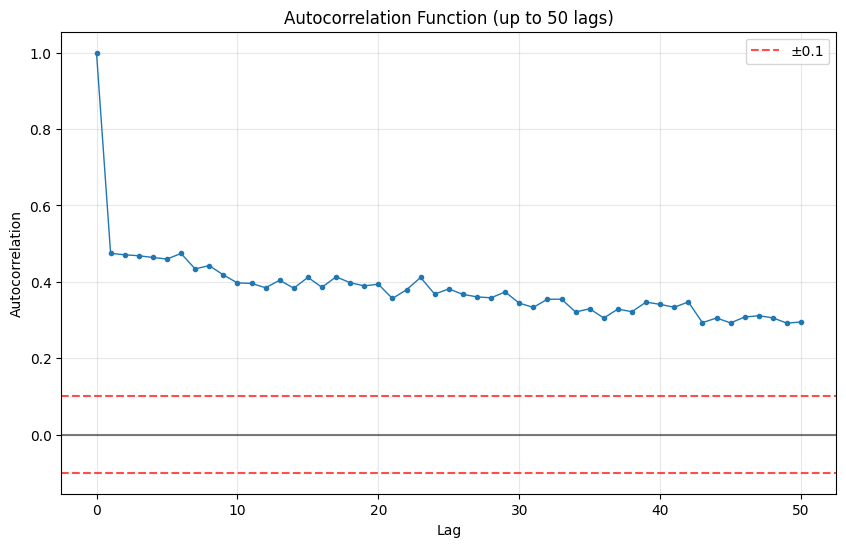

array([1.        , 0.47476358, 0.47073051, 0.46831128, 0.46371391,
       0.45966842, 0.47426904, 0.43381798, 0.44248713, 0.41814005,
       0.39706695, 0.39588472, 0.38444471, 0.40422516, 0.38319039,
       0.41177431, 0.38564935, 0.41302041, 0.39767845, 0.38933912,
       0.39375352, 0.35635771, 0.37910544, 0.41136195, 0.3678027 ,
       0.38138325, 0.36714593, 0.36054395, 0.35811033, 0.37347998,
       0.34418339, 0.33299952, 0.35436037, 0.35442339, 0.32097153,
       0.32943111, 0.30516789, 0.32852945, 0.32169867, 0.34689522,
       0.34092009, 0.33334226, 0.347233  , 0.29299622, 0.30520425,
       0.29243495, 0.30780216, 0.31115239, 0.30558887, 0.29173094,
       0.29488865])

In [14]:
sigmas = np.load(f'store/{notebook}_sigmas_default.npy')
plot_autocorrelation(sigmas[-1000:], nlags=50)

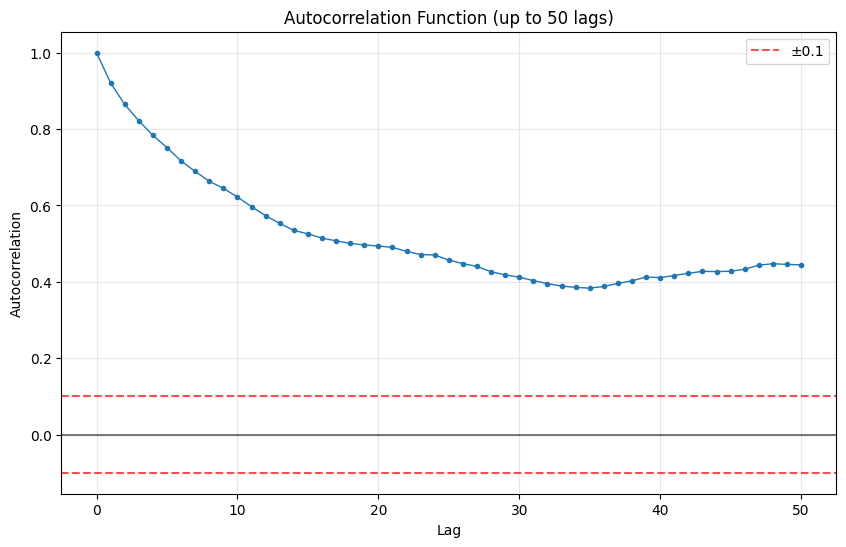

array([1.        , 0.92086675, 0.86465469, 0.82181246, 0.78366504,
       0.75158536, 0.71660639, 0.68927762, 0.66335127, 0.64501379,
       0.62198308, 0.59676288, 0.57305965, 0.55305503, 0.53468034,
       0.52571008, 0.51428413, 0.50742801, 0.50081364, 0.49650509,
       0.49380233, 0.49008329, 0.47978534, 0.47139668, 0.47030502,
       0.45690195, 0.44766683, 0.44025626, 0.42640633, 0.41823505,
       0.41208712, 0.40325116, 0.39518883, 0.38902902, 0.38534955,
       0.38346682, 0.38788831, 0.39568034, 0.40258742, 0.41252699,
       0.41099749, 0.41652221, 0.42241074, 0.42737682, 0.42688724,
       0.42765154, 0.4329288 , 0.44366472, 0.44745567, 0.44557166,
       0.44448082])

In [15]:
rmses = np.load(f'store/{notebook}_rmses_default.npy')
plot_autocorrelation(rmses[-1000:], nlags=50)

## MTMH

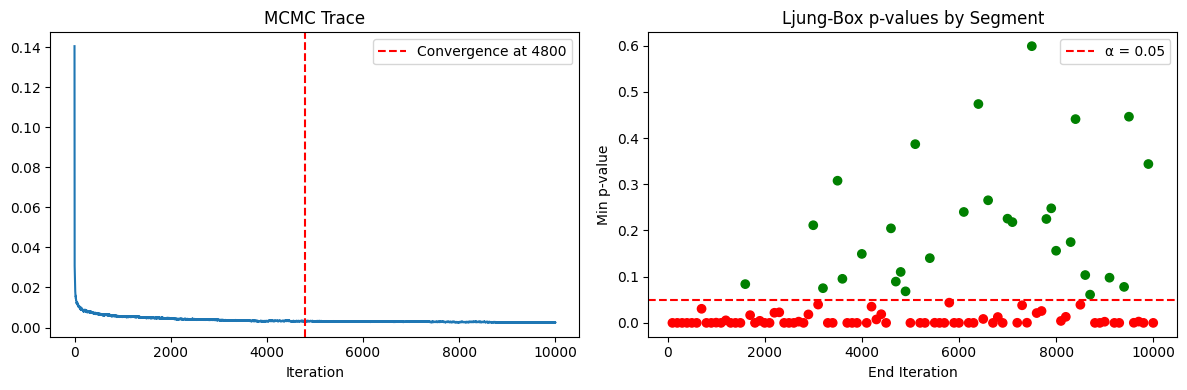

Chain converged: True
Convergence at iteration: 4800
Convergence rate: 29.00%


In [16]:
# Diagnose mtmh sigma convergence
sigmas = np.load(f'store/{notebook}_sigmas_mtmh.npy')
convergence_result = segmented_ljung_box_test(sigmas, segment_length=100)

print(f"Chain converged: {convergence_result['converged']}")
if convergence_result['converged']:
    print(f"Convergence at iteration: {convergence_result['convergence_iteration']}")
print(f"Convergence rate: {convergence_result['convergence_rate']:.2%}")

/nfs/home/svu/e0950116/bart-playground/diagnosis/diagnosis.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


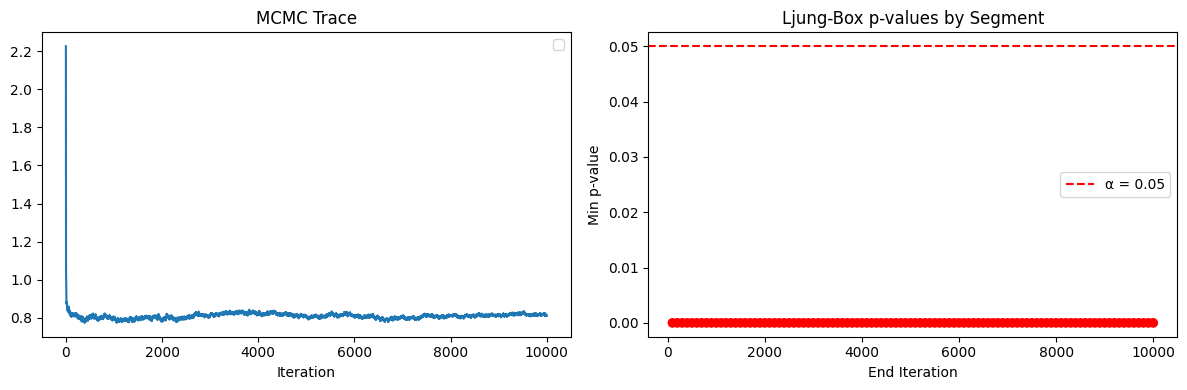

Chain converged: False
Convergence rate: 0.00%


In [17]:
# Diagnose mtmh rmse convergence
rmses = np.load(f'store/{notebook}_rmses_mtmh.npy')
convergence_result = segmented_ljung_box_test(rmses, segment_length=100)

print(f"Chain converged: {convergence_result['converged']}")
if convergence_result['converged']:
    print(f"Convergence at iteration: {convergence_result['convergence_iteration']}")
print(f"Convergence rate: {convergence_result['convergence_rate']:.2%}")

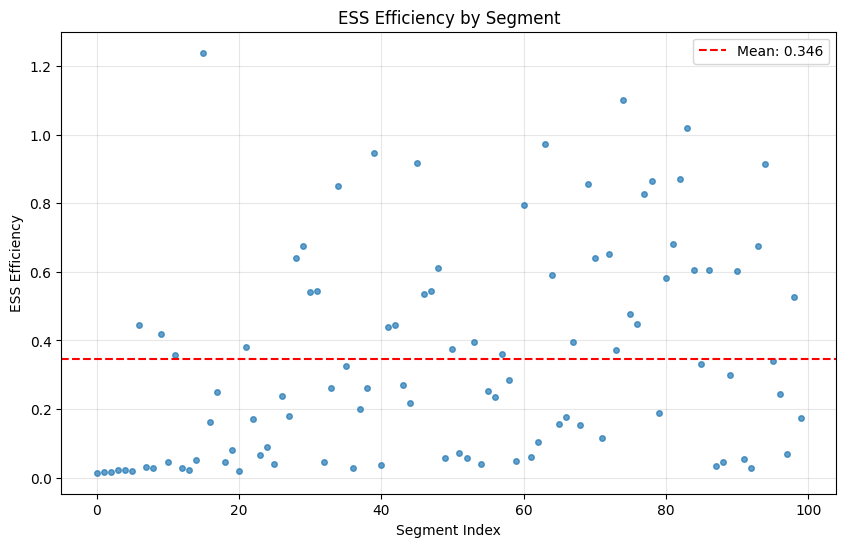

In [18]:
sigmas = np.load(f'store/{notebook}_sigmas_mtmh.npy')
efficiencies = segment_ess_efficiency(sigmas, segment_length=100)

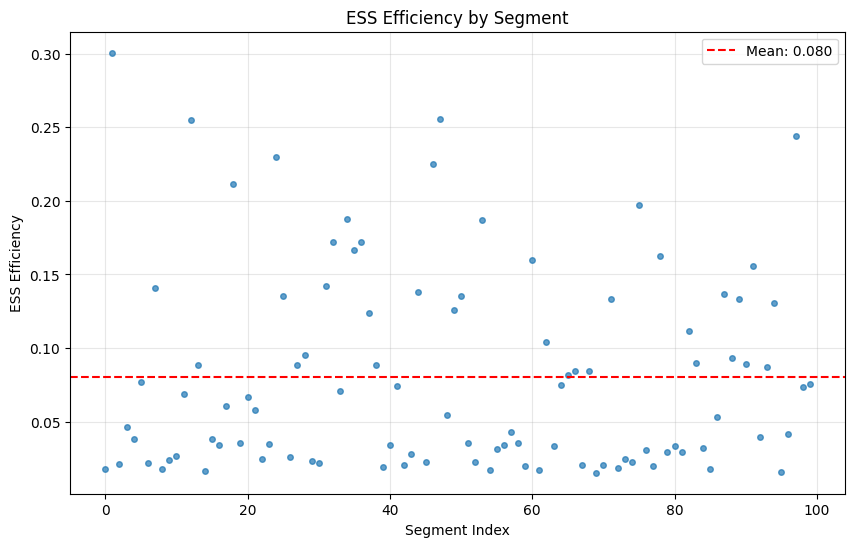

In [19]:
rmses = np.load(f'store/{notebook}_rmses_mtmh.npy')
efficiencies = segment_ess_efficiency(rmses, segment_length=100)

### Autocorrelation

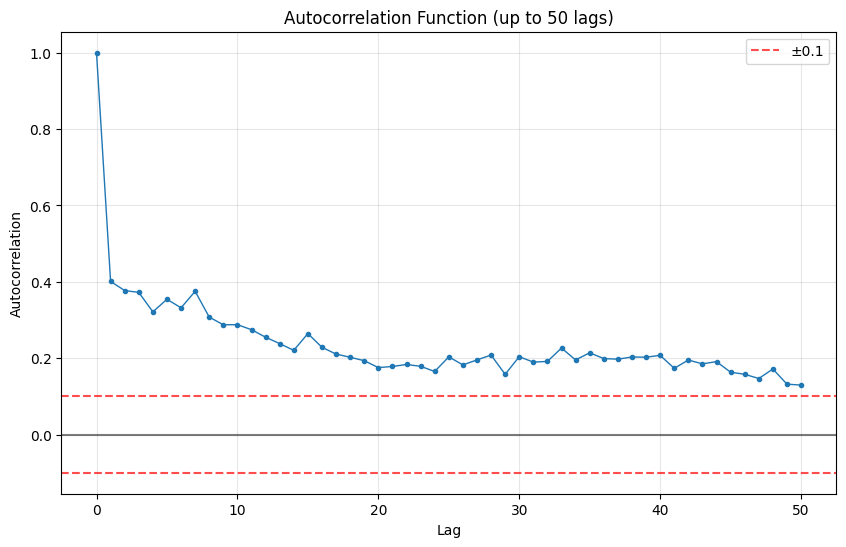

array([1.        , 0.40103761, 0.37708765, 0.37228862, 0.32130732,
       0.35432675, 0.33187971, 0.37514145, 0.30759721, 0.28746244,
       0.28770317, 0.27462053, 0.25494909, 0.23809555, 0.22052594,
       0.2644454 , 0.22851316, 0.21073818, 0.20237314, 0.19344356,
       0.1753684 , 0.17826939, 0.1834718 , 0.17869394, 0.16512022,
       0.20353599, 0.18240907, 0.19541602, 0.20818361, 0.15767292,
       0.20388259, 0.18968467, 0.19146363, 0.22654181, 0.19541165,
       0.21407345, 0.19890431, 0.19741942, 0.20306781, 0.2025702 ,
       0.20741984, 0.17340675, 0.19515805, 0.18517784, 0.19094664,
       0.16322632, 0.15782899, 0.14671217, 0.17164261, 0.13197512,
       0.12953327])

In [20]:
sigmas = np.load(f'store/{notebook}_sigmas_mtmh.npy')
plot_autocorrelation(sigmas[-1000:], nlags=50)

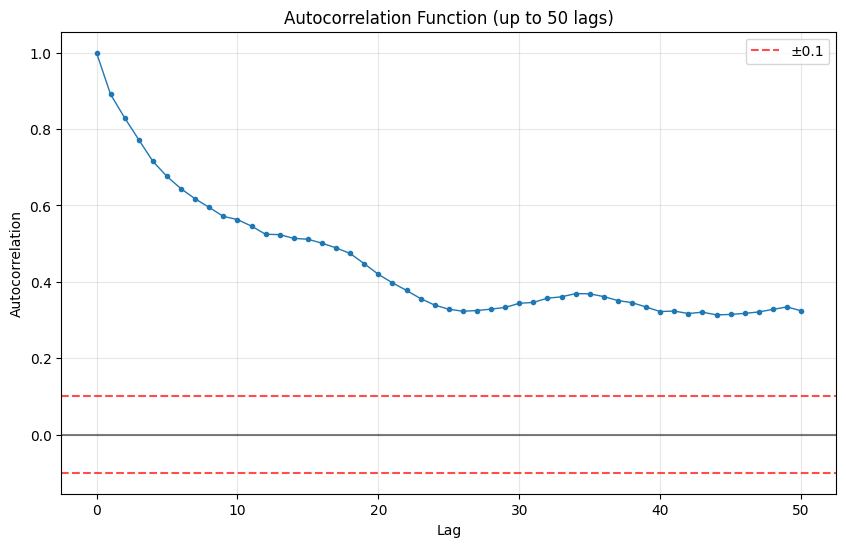

array([1.        , 0.89078338, 0.82935467, 0.77213615, 0.71558403,
       0.67603603, 0.64368733, 0.61732296, 0.59496383, 0.57134519,
       0.56310003, 0.54578458, 0.52455532, 0.52359295, 0.51377049,
       0.51148158, 0.50121767, 0.48891621, 0.47417382, 0.4475387 ,
       0.4196918 , 0.397392  , 0.37744541, 0.35604005, 0.33899863,
       0.32820585, 0.3229815 , 0.32476018, 0.32848714, 0.332859  ,
       0.34371156, 0.3460629 , 0.3570951 , 0.36071647, 0.3690392 ,
       0.36859232, 0.3612191 , 0.35090079, 0.3454836 , 0.33399268,
       0.32213402, 0.32342852, 0.31692258, 0.32055686, 0.31331996,
       0.31455826, 0.31734029, 0.32102982, 0.32776875, 0.33425482,
       0.32417347])

In [21]:
rmses = np.load(f'store/{notebook}_rmses_mtmh.npy')
plot_autocorrelation(rmses[-1000:], nlags=50)